In [42]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [43]:
from sklearn import datasets
boston = datasets.load_boston()

In [44]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [45]:
boston_full = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_full['PRICE'] = boston['target']
print(boston_full)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [46]:
X, y = pd.DataFrame(boston['data'], columns=boston['feature_names']), boston['target']

# Linear regression model

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape[0] / X.shape[0], X_test.shape[0] / X.shape[0])

0.6996047430830039 0.30039525691699603


In [48]:
X_train = X_train.reset_index(drop=True)
X_test= X_test.reset_index(drop=True)

Text(0, 0.5, 'Price')

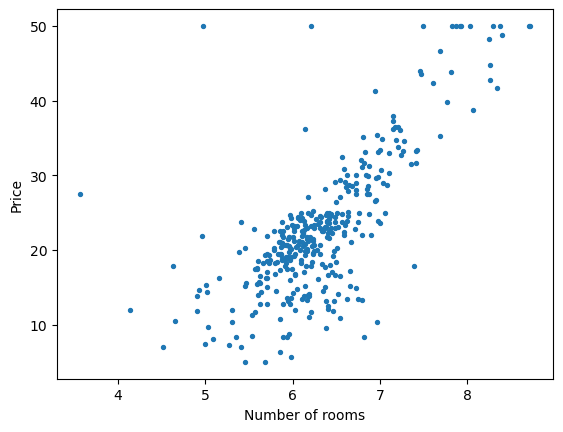

In [49]:
plt.scatter(X_train['RM'], y_train, s=8)
plt.xlabel('Number of rooms')
plt.ylabel('Price')
#We can see that these variables are linear dependent

In [50]:
np.corrcoef(X_train['RM'], y_train)[0][1]
#Pearseon correlation factor

0.7442292975830678

In [51]:
x_with_const = sm.add_constant(X_train['RM'], prepend=True, has_constant='skip')
x_test_with_const = sm.add_constant(X_test['RM'], prepend=True, has_constant='skip')

model1 = sm.OLS(endog = y_train, exog = x_with_const)
fitted_model1 = model1.fit()
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     437.0
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.15e-63
Time:                        20:58:30   Log-Likelihood:                -1147.4
No. Observations:                 354   AIC:                             2299.
Df Residuals:                     352   BIC:                             2307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.7419      2.960    -13.086      0.000     -44.564     -32.919
RM             9.7406      0.466     20.905      0.000       8.824      10.657
==============================================================================
Omnibus:                      109.596   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              918.146
Skew:                           1.037   Prob(JB):                    4.24e-200
Kurtosis:                      10.612   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#We can see based on R^2 that our model fits to data pretty good when we asume that it is only
# one variable model. 
#It's not normal distribution (based on p-value of Jarque-Ber and Omnibus test)
#There is lack of autocorrelation between rests in model (Durbin Watson)
#Intercpet is relevant in model. 
#There is a connection between RM and Price (p-value of RM t-student test)

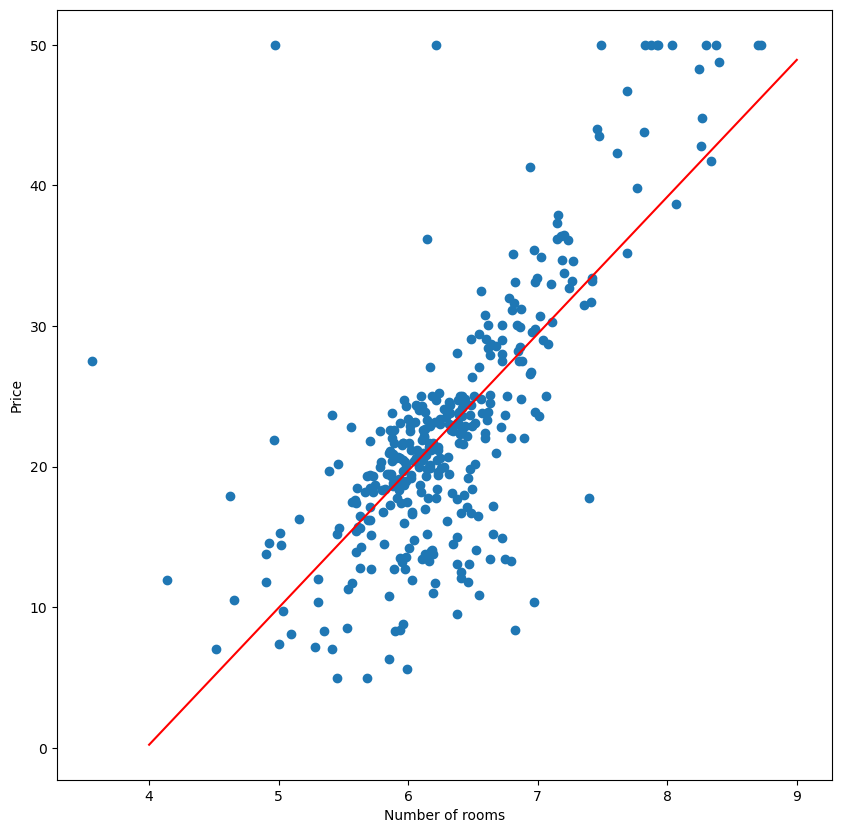

In [53]:
plt.figure(figsize = (10, 10))
plt.scatter(X_train['RM'], y_train)
plt.xlabel('Number of rooms')
plt.ylabel('Price')

X_plot = np.linspace(4, 9, 5)
plt.plot(X_plot, X_plot*fitted_model1.params[1]+fitted_model1.params[0], color='red')

[9.74062315]
-38.74191599333736


Text(0, 0.5, 'Price')

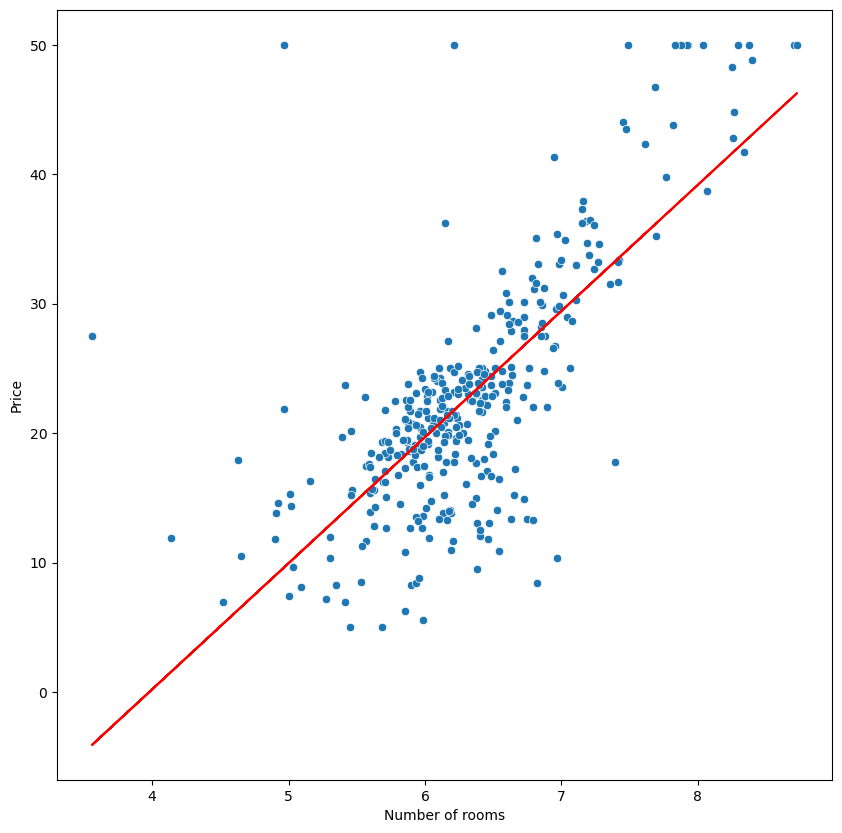

In [54]:
#second method using scikit-learn
x_train_data = np.array(X_train['RM']).reshape(-1, 1)
x_test_data = np.array(X_test['RM']).reshape(-1, 1)
lm1 = LinearRegression()
lm1.fit(X=x_train_data, y=y_train)
print(lm1.coef_)
print(lm1.intercept_)
plt.figure(figsize = (10, 10))
sns.scatterplot(X_train['RM'], y_train)
plt.plot(X_train['RM'], lm1.predict(x_train_data), color = 'red')
plt.xlabel('Number of rooms')
plt.ylabel('Price')

Text(0, 0.5, 'Predicted values')

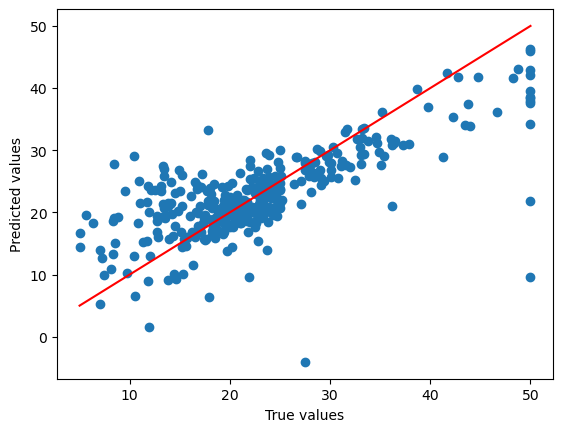

In [55]:
#diagnostic plots:
#a) plot of predicted versus true values

Ylin = np.linspace(y_train.min(), y_train.max(), 100)
plt.scatter(y_train, fitted_model1.fittedvalues)
plt.plot(Ylin, Ylin, color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
#We can see that points fits to straight line not very well

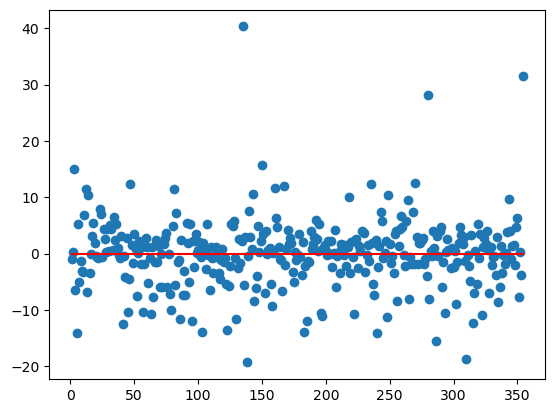

In [56]:
#Residual chart 1
xrang = np.arange(1, len(fitted_model1.resid)+1)
plt.scatter(xrang, fitted_model1.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red');
#Variance is probably common, we cannot see significant deviation from y=0

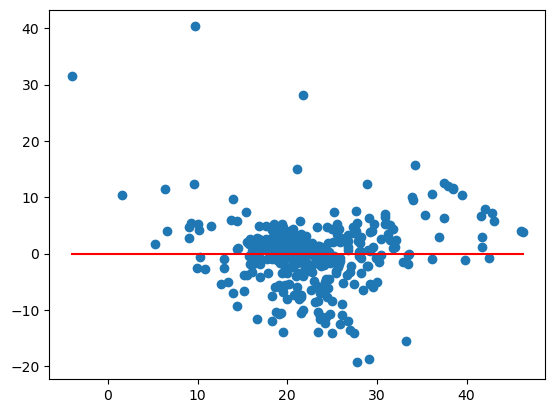

In [57]:
#Resudiual chart 2
xrang = np.arange(fitted_model1.fittedvalues.min(), fitted_model1.fittedvalues.max(), 0.1)
plt.scatter(fitted_model1.fittedvalues, fitted_model1.resid)
plt.plot(xrang, np.repeat(0, len(xrang)), color='red')
#probably OK,some of points on the right might raise doubts

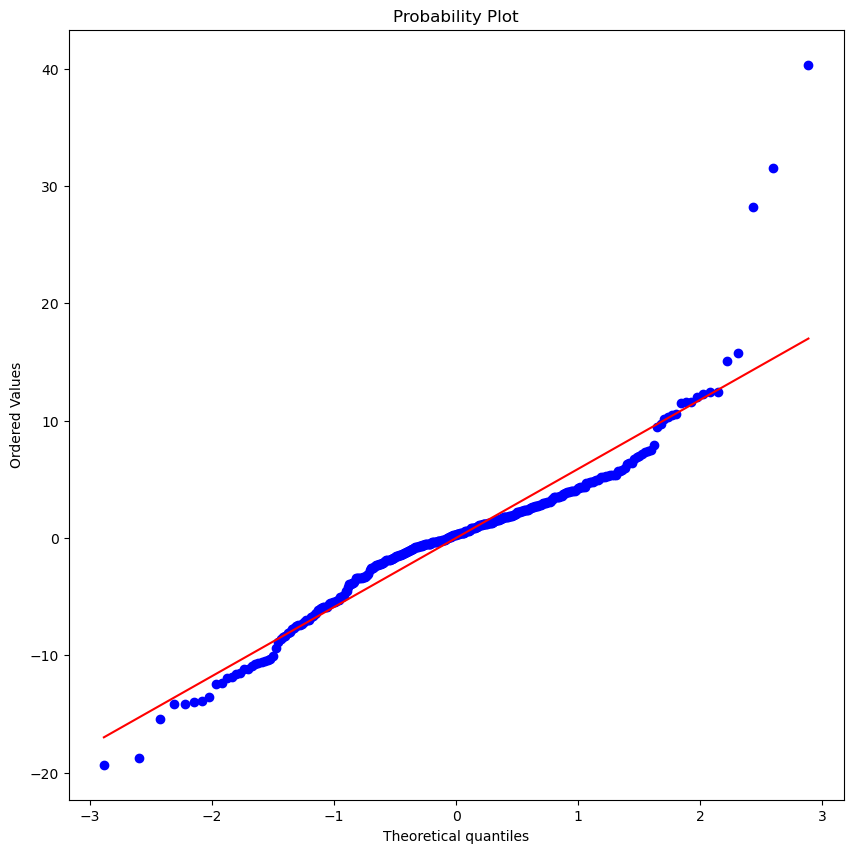

In [58]:
#qqplot
import scipy as sp
fig, ax = plt.subplots(figsize = (10, 10))
sp.stats.probplot(fitted_model1.resid, plot = ax, dist='norm', fit=True);
plt.show()
#The chart confirms that errors are not from normal distribution

In [59]:
def fitting_rate(model, X_train, y_train, X_test, y_test):
    ratings = {}
    #Fitting quality
    try:
        r2 = model.score(X_train, y_train)
        fitted_values = model.predict(X_train)
        mae_train = metrics.mean_squared_error(y_true=y_train, y_pred=fitted_values)
        mse_train = metrics.median_absolute_error(y_true=y_train, y_pred=fitted_values)
    except AttributeError:
        r2 = model.rsquared
        mae_train = metrics.mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
        mse_train = metrics.median_absolute_error(y_true=y_train, y_pred=model.predict(X_train))
    ratings['R2'] = r2
    ratings['mae_train'] = mae_train
    ratings['mse_train'] = mse_train
    

    #Prediction quality
    y_pred = model.predict(X_test)
    mae = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse = metrics.median_absolute_error(y_true=y_test, y_pred=y_pred)
    ratings['mae_test'] = mae
    ratings['mse_test'] = mse
    
    return ratings

In [97]:
models_ratings['lm(Price~RM)'] = pd.DataFrame(list(fitting_rate(fitted_model1, x_with_const, y_train, x_test_with_const, y_test).values()),
                       index=list(fitting_rate(fitted_model1, x_with_const, y_train, 
                                                  x_test_with_const, y_test).keys()), 
                      columns=['lm(Price~RM)'])

# Multiple regression model

In [62]:
df_train_model2 = X_train
df_train_model2['PRICE'] = y_train

In [63]:
columns = list(boston_full.columns)
columns.remove('PRICE')
features = '+'.join(columns)
model2 = smf.ols('PRICE~'+features, data=df_train_model2)
fitted_model2 = model2.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     85.00
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           2.44e-98
Time:                        20:58:31   Log-Likelihood:                -1034.2
No. Observations:                 354   AIC:                             2096.
Df Residuals:                     340   BIC:                             2151.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.9813      6.043      4.796      0.000      17.094      40.868
CRIM          -0.1010      0.035     -2.909      0.004      -0.169      -0.033
ZN             0.0400      0.016      2.551      0.011       0.009       0.071
INDUS          0.0754      0.072      1.045      0.297      -0.067       0.217
CHAS           0.2646      1.063      0.249      0.804      -1.826       2.355
NOX          -14.3409      4.595     -3.121      0.002     -23.380      -5.302
RM             4.8332      0.485      9.971      0.000       3.880       5.787
AGE           -0.0074      0.015     -0.488      0.626      -0.037       0.023
DIS           -1.3267      0.226     -5.879      0.000      -1.771      -0.883
RAD            0.2735      0.075      3.660      0.000       0.126       0.420
TAX           -0.0130      0.004     -3.059      0.002      -0.021      -0.005
PTRATIO       -0.9566      0.150     -6.372      0.000      -1.252      -0.661
B              0.0064      0.003      1.965      0.050   -7.31e-06       0.013
LSTAT         -0.4866      0.061     -8.032      0.000      -0.606      -0.367
==============================================================================
Omnibus:                      164.467   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1012.790
Skew:                           1.865   Prob(JB):                    1.19e-220
Kurtosis:                      10.399   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
#There is relationship between dependent variable and at least one independent variable (look at
#p-value of F-statistic)
#Irrelevant variables: INDUS, CHAS, AGE, B - based on t-statistic p-value (alpha = 0.05)
#We can delete irrelevant variables and update our model

In [65]:
irrelevant_columns = fitted_model2.pvalues.where(fitted_model2.pvalues.values>0.05).dropna().index

In [66]:
for column in list(irrelevant_columns):
    columns.remove(column)

In [67]:
features = '+'.join(columns)
model2_updt = smf.ols('PRICE~'+features, data=df_train_model2)
fitted_model2_updt = model2_updt.fit()
fitted_model2_updt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     121.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          2.47e-101
Time:                        20:58:31   Log-Likelihood:                -1036.8
No. Observations:                 354   AIC:                             2094.
Df Residuals:                     344   BIC:                             2132.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.2530      5.718      5.640      0.000      21.006      43.500
CRIM          -0.1043      0.035     -3.008      0.003      -0.173      -0.036
ZN             0.0394      0.016      2.537      0.012       0.009       0.070
NOX          -13.9652      4.260     -3.278      0.001     -22.344      -5.586
RM             4.6506      0.469      9.918      0.000       3.728       5.573
DIS           -1.3625      0.213     -6.408      0.000      -1.781      -0.944
RAD            0.2353      0.070      3.368      0.001       0.098       0.373
TAX           -0.0113      0.004     -3.058      0.002      -0.019      -0.004
PTRATIO       -0.9310      0.148     -6.286      0.000      -1.222      -0.640
LSTAT         -0.5126      0.056     -9.216      0.000      -0.622      -0.403
==============================================================================
Omnibus:                      157.411   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.527
Skew:                           1.791   Prob(JB):                    7.03e-199
Kurtosis:                      10.002   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
fitting_rate(fitted_model2, X_train, y_train, X_test, y_test)

{'R2': 0.7647156501433012,
 'mae_train': 20.184336639873155,
 'mse_train': 2.317898471477722,
 'mae_test': 28.405854810508412,
 'mse_test': 2.7094922194474744}

In [69]:
fitting_rate(fitted_model2_updt, X_train, y_train, X_test, y_test)

{'R2': 0.76118845659477,
 'mae_train': 20.486923964618313,
 'mse_train': 2.3254803235694688,
 'mae_test': 29.66465266767459,
 'mse_test': 2.811748563458064}

In [70]:
models_ratings = pd.DataFrame(list(fitting_rate(fitted_model2, X_train, y_train, X_test, y_test).values()),
                               index=list(fitting_rate(fitted_model2, X_train, y_train, X_test, y_test).keys()), 
                      columns=['lm(Price~*)'])
models_ratings['lm(Pice)~4 less variables'] = list(fitting_rate(fitted_model2_updt, X_train, y_train, X_test, y_test).values())

In [71]:
models_ratings

,lm(Price~*),lm(Pice)~4 less variables
R2,0.764716,0.761188
mae_train,20.184337,20.486924
mse_train,2.317898,2.325480
mae_test,28.405855,29.664653
mse_test,2.709492,2.811749


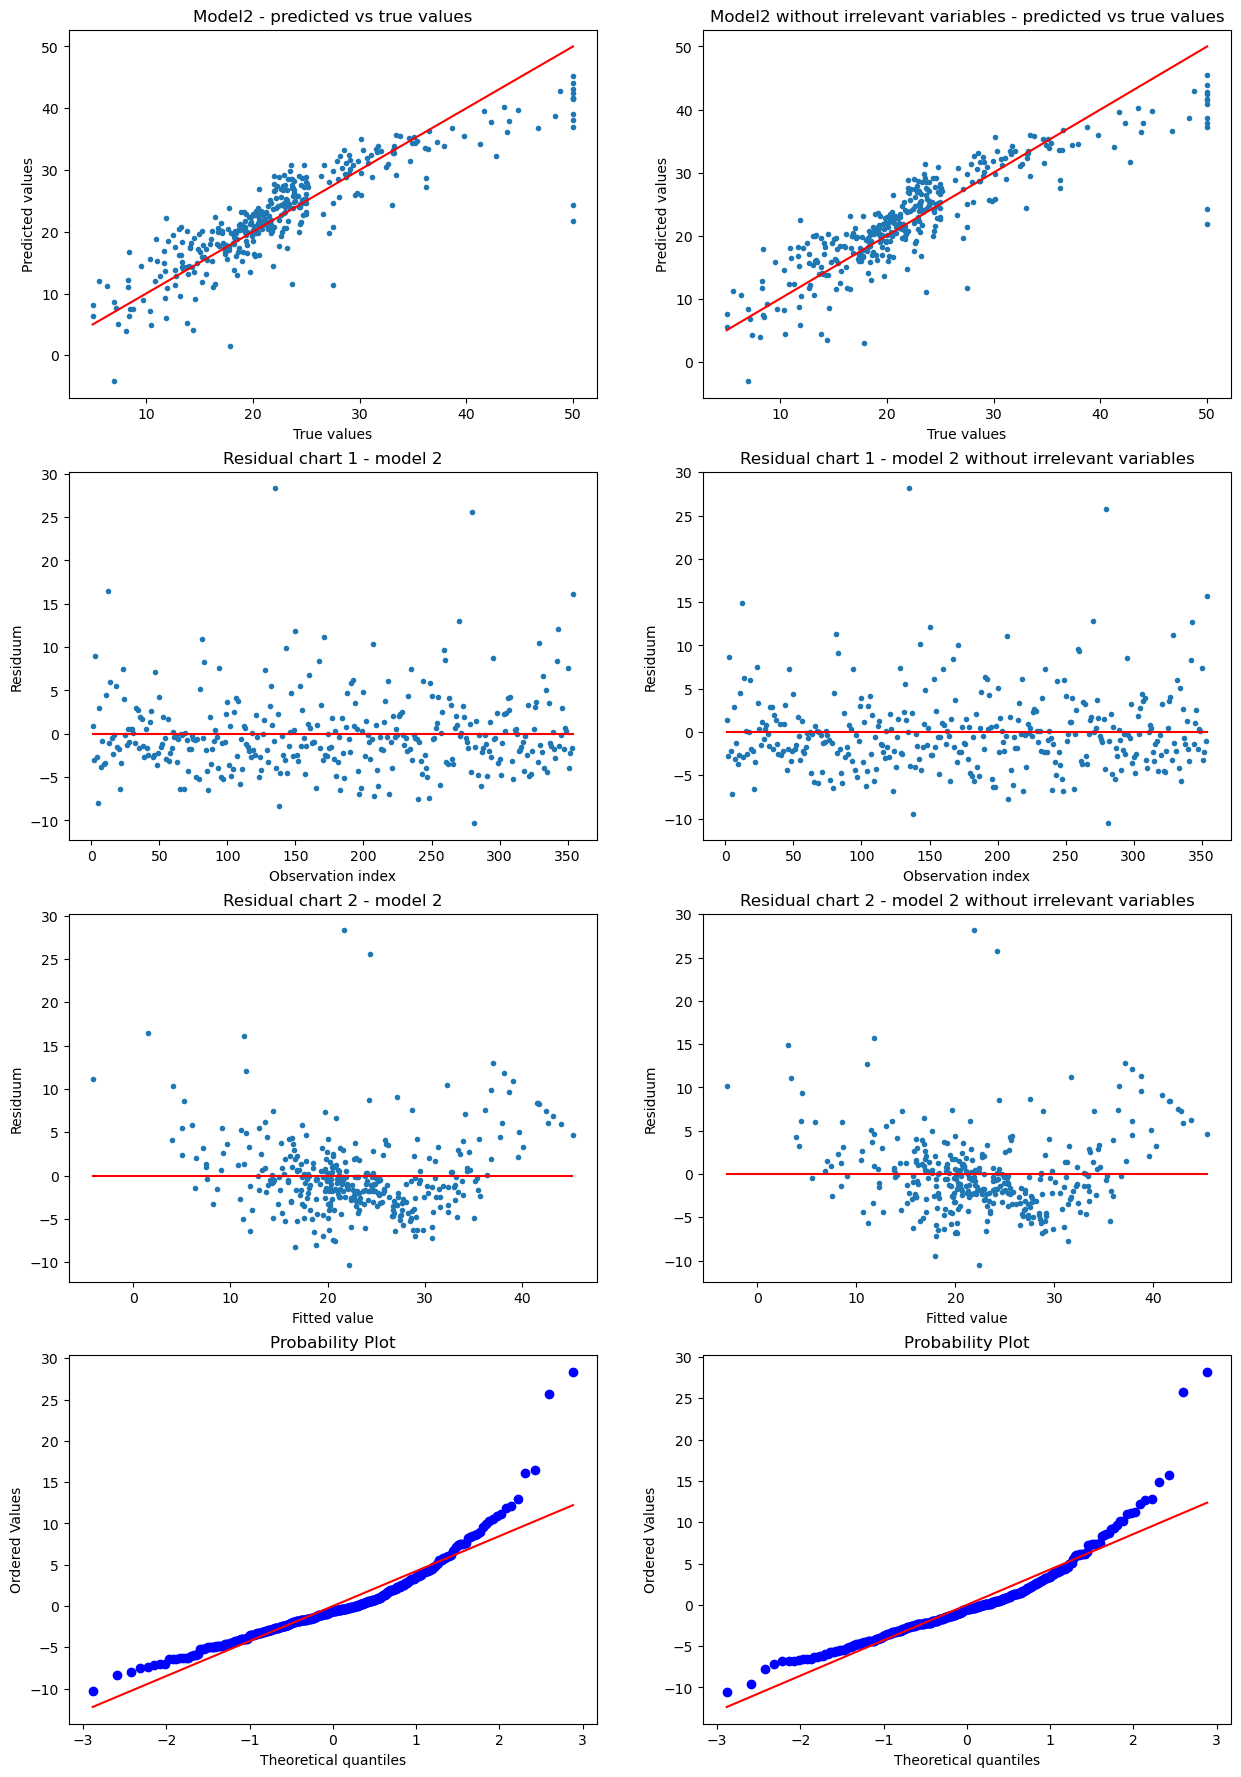

In [72]:
#Diagnostic charts for models 2 (all variables) and 2-updated (withous irrelevant variables)
#plot of predicted versus true values
fig, ax = plt.subplots(4, 2, figsize=(15, 22))

Ylin = np.linspace(y_train.min(), y_train.max(), 100)
ax[0, 0].plot(y_train, fitted_model2.fittedvalues, '.')
ax[0, 0].plot(Ylin, Ylin, color='red')
ax[0, 0].set_xlabel('True values')
ax[0, 0].set_ylabel('Predicted values')
ax[0, 0].title.set_text('Model2 - predicted vs true values')

#Residual chart 1 for model2
xrang = np.arange(1, len(fitted_model2.resid)+1)
ax[1, 0].plot(xrang, fitted_model2.resid, '.')
ax[1, 0].plot(xrang, np.repeat(0, len(xrang)), color='red')
ax[1, 0].set_xlabel('Observation index')
ax[1, 0].set_ylabel('Residuum')
ax[1, 0].title.set_text('Residual chart 1 - model 2')

#Resudiual chart 2 for model2
xrang2 = np.arange(fitted_model2.fittedvalues.min(), fitted_model2.fittedvalues.max(), 0.1)
ax[2, 0].plot(fitted_model2.fittedvalues, fitted_model2.resid, '.')
ax[2, 0].plot(xrang2, np.repeat(0, len(xrang2)), color='red')
ax[2, 0].set_xlabel('Fitted value')
ax[2, 0].set_ylabel('Residuum')
ax[2, 0].title.set_text('Residual chart 2 - model 2')

#qqplot for model2
sp.stats.probplot(fitted_model2.resid, plot = ax[3, 0], dist='norm', fit=True);

#the same for updated model2
#plot of predicted versus true values

Ylin_updt = np.linspace(y_train.min(), y_train.max(), 100)
ax[0, 1].plot(y_train, fitted_model2_updt.fittedvalues, '.')
ax[0, 1].plot(Ylin_updt, Ylin_updt, color='red')
ax[0, 1].set_xlabel('True values')
ax[0, 1].set_ylabel('Predicted values')
ax[0, 1].title.set_text('Model2 without irrelevant variables - predicted vs true values')

#Residual chart 1 for updated model2
xrang_updt = np.arange(1, len(fitted_model2.resid)+1)
ax[1, 1].plot(xrang_updt, fitted_model2_updt.resid, '.')
ax[1, 1].plot(xrang_updt, np.repeat(0, len(xrang_updt)), color='red')
ax[1, 1].set_xlabel('Observation index')
ax[1, 1].set_ylabel('Residuum')
ax[1, 1].title.set_text('Residual chart 1 - model 2 without irrelevant variables')

#Resudiual chart 2 for updated model2
xrang2_updt = np.arange(fitted_model2_updt.fittedvalues.min(), fitted_model2_updt.fittedvalues.max(), 0.1)
ax[2, 1].plot(fitted_model2_updt.fittedvalues, fitted_model2_updt.resid, '.')
ax[2, 1].plot(xrang2_updt, np.repeat(0, len(xrang2_updt)), color='red')
ax[2, 1].set_xlabel('Fitted value')
ax[2, 1].set_ylabel('Residuum')
ax[2, 1].title.set_text('Residual chart 2 - model 2 without irrelevant variables')

#qqplot for updated model2
sp.stats.probplot(fitted_model2_updt.resid, plot = ax[3, 1], dist='norm', fit=True);


# Multiple regression regularisation

In [73]:
def grid_search_alpha(model, X, y, params, scoring, cv=10):
    "That's the funcion which finds the best alpha parameters"
    grid = GridSearchCV(    
        make_pipeline(
            StandardScaler(),
            model
        ),
        params,
        scoring=scoring,
        cv=10
    )
    grid.fit(X,y) 
    return grid.best_params_


In [74]:
#Now we can find alpha for Ridge and Lasso regularisation
best_alpha_ridge = grid_search_alpha(Ridge(), X_train, y_train, {'ridge__alpha': np.linspace(0.01, 10, 100)}, scoring='neg_median_absolute_error')

In [75]:
best_alpha_lasso = grid_search_alpha(Lasso(max_iter=10e3), X_train, y_train, {'lasso__alpha': np.linspace(0.01, 10, 100)}, scoring='neg_median_absolute_error')

In [76]:
#Next step: create models with optimal alphas
opt_ridge = make_pipeline(
    StandardScaler(),
    Ridge(best_alpha_ridge['ridge__alpha'])
)

opt_lasso = make_pipeline(
    StandardScaler(),
    Lasso(best_alpha_lasso['lasso__alpha'])
)

fitted_opt_ridge = opt_ridge.fit(X_train, y_train)
fitted_opt_lasso = opt_lasso.fit(X_train, y_train)

In [77]:
(best_alpha_ridge, best_alpha_lasso)

({'ridge__alpha': 0.01}, {'lasso__alpha': 0.01})

In [78]:
opt_ridge = make_pipeline(
    StandardScaler(),
    Ridge(best_alpha_ridge['ridge__alpha']))
opt_lasso = make_pipeline(
    StandardScaler(),
    Lasso(best_alpha_lasso['lasso__alpha']))
fitted_opt_ridge = opt_ridge.fit(X_train, y_train)
fitted_opt_lasso = opt_lasso.fit(X_train, y_train)

In [81]:
models_ratings['LM(Ridge)~*'] = fitting_rate(fitted_opt_ridge.fit(X_train, y_train), X_train, y_train, X_test, y_test).values()
models_ratings['LM(Lasso)~*'] = fitting_rate(fitted_opt_lasso.fit(X_train, y_train), X_train, y_train, X_test, y_test).values()

In [82]:
models_ratings

,lm(Price~*),lm(Pice)~4 less variables,LM(Ridge)~*,LM(Lasso)~*
R2,0.764716,0.761188,0.764716,0.764636
mae_train,20.184337,20.486924,20.184337,20.191137
mse_train,2.317898,2.325480,2.316894,2.284228
mae_test,28.405855,29.664653,28.406008,28.489080
mse_test,2.709492,2.811749,2.709610,2.729156


# Polynomial regression

In [84]:
#First we have to find optimal polynomial degree
estimator_degree = make_pipeline(
    PolynomialFeatures(),
    LinearRegression()
)
grid_poly = GridSearchCV(
    estimator=estimator_degree,
    param_grid={
        'polynomialfeatures__degree': np.arange(1, 7)},
    scoring='neg_median_absolute_error',
    cv=10   
    )

In [85]:
grid_poly.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([1, 2, 3, 4, 5, 6])},
             scoring='neg_median_absolute_error')

In [86]:
grid_poly.best_params_

{'polynomialfeatures__degree': 2}

In [87]:
model_opt_poly_reg = make_pipeline(
        PolynomialFeatures(degree=2,include_bias=False),
        LinearRegression()
    )
model_opt_poly_reg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [88]:
models_ratings['polynomial_reg(Price)~*'] = fitting_rate(model_opt_poly_reg, X_train, y_train, X_test, y_test).values()

In [89]:
models_ratings

,lm(Price~*),lm(Pice)~4 less variables,LM(Ridge)~*,LM(Lasso)~*,polynomial_reg(Price)~*
R2,0.764716,0.761188,0.764716,0.764636,0.936403
mae_train,20.184337,20.486924,20.184337,20.191137,5.455829
mse_train,2.317898,2.325480,2.316894,2.284228,1.412103
mae_test,28.405855,29.664653,28.406008,28.489080,18.871409
mse_test,2.709492,2.811749,2.709610,2.729156,2.088181


# Polynomial regression regularization

In [90]:
#Ridge regularization of polynomial regression model
estimator_poly_reg_ridge = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    Ridge())

grid_poly_ridge = GridSearchCV(
    estimator=estimator_poly_reg_ridge,
    param_grid={
        'polynomialfeatures__degree': np.arange(1, 7),
        'ridge__alpha': np.arange(0.1, 10, 0.1) 
    }   
)

grid_poly_ridge.fit(X_train, y_train)
grid_poly_ridge.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 1.9000000000000001}

In [91]:
model_poly_reg_ridge = make_pipeline(
    PolynomialFeatures(degree=grid_poly_ridge.best_params_['polynomialfeatures__degree']),
    StandardScaler(),
    Ridge(alpha=grid_poly_ridge.best_params_['ridge__alpha'])
)
model_poly_reg_ridge.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1.9000000000000001))])

In [92]:
models_ratings['poly_reg_Ridge~'] = fitting_rate(model_poly_reg_ridge, X_train, y_train, X_test, y_test).values()

In [93]:
#Lasso regularization of polynomial regression model
estimator_poly_reg_lasso = make_pipeline(
    PolynomialFeatures(),
    StandardScaler(),
    Lasso())

grid_poly_lasso = GridSearchCV(
    estimator=estimator_poly_reg_lasso,
    param_grid={
        'polynomialfeatures__degree': np.arange(1, 5),
        'lasso__alpha': np.arange(0.001, 0.1, 0.01)
    }
)

grid_poly_lasso.fit(X_train, y_train)
grid_poly_lasso.best_params_

{'lasso__alpha': 0.040999999999999995, 'polynomialfeatures__degree': 4}

In [94]:
model_poly_reg_lasso = make_pipeline(
    PolynomialFeatures(degree=grid_poly_lasso.best_params_['polynomialfeatures__degree']),
    StandardScaler(),
    Lasso(alpha=grid_poly_lasso.best_params_['lasso__alpha'])
)

model_poly_reg_lasso.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.040999999999999995))])

In [95]:
models_ratings['poly_reg_Lasso~'] = fitting_rate(model_poly_reg_lasso, X_train, y_train, X_test, y_test).values()

# Summary

In [98]:
models_ratings

,lm(Price~*),lm(Pice)~4 less variables,LM(Ridge)~*,LM(Lasso)~*,polynomial_reg(Price)~*,poly_reg_Ridge~,poly_reg_Lasso~,lm(Price~RM)
R2,0.764716,0.761188,0.764716,0.764636,0.936403,0.911861,0.916461,0.553877
mae_train,20.184337,20.486924,20.184337,20.191137,5.455829,7.561191,7.166578,38.271529
mse_train,2.317898,2.325480,2.316894,2.284228,1.412103,1.426648,1.405366,2.673882
mae_test,28.405855,29.664653,28.406008,28.489080,18.871409,16.573469,18.183620,56.691637
mse_test,2.709492,2.811749,2.709610,2.729156,2.088181,1.742893,1.676215,3.295596


As we can see in table above the best regression model to solve this task is polynomial regression with regularisation (probably Lasso will be the better one). Models are not overfitted. They fit well in the point cloud (high R^2) and are  well-adjusted to the data (MSE, MAE).